In [374]:
# Import libraries and packages
import openml
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


# for building linear regression models and preparing data
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# reduce display precision on numpy arrays
np.set_printoptions(precision=2)


In [375]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [400]:
# load dataset directly from openML 
dataset_id = 44989
dataset = openml.datasets.get_dataset(dataset_id)
house, *_ = dataset.get_data()

In [401]:
# Run this cell so pandas displays all columns
pd.set_option('display.max_columns', None)

In [402]:
# Display the first 10 rows of the data
house.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0.0,1955.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014,10,13
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400.0,1951.0,1991.0,98125,47.7210,-122.319,1690.0,7639.0,2014,12,9
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0.0,1933.0,0.0,98028,47.7379,-122.233,2720.0,8062.0,2015,2,25
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910.0,1965.0,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014,12,9
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0.0,1987.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015,2,18


In [403]:
# Assuming 'house' is your DataFrame
current_year = 2015  # Set the current year to 2015

# Calculate the age of the house and create a new 'age' column
house['age'] = current_year - house['yr_built']


In [ ]:
house.tail(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day,age
21608,360000.0,3,2.50,1530.0,1131.0,3.0,0,0,3,8,1530.0,0.0,2009.0,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014,5,21,6.0
21609,400000.0,4,2.50,2310.0,5813.0,2.0,0,0,3,8,2310.0,0.0,2014.0,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015,2,23,1.0
21610,402101.0,2,0.75,1020.0,1350.0,2.0,0,0,3,7,1020.0,0.0,2009.0,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014,6,23,6.0
21611,400000.0,3,2.50,1600.0,2388.0,2.0,0,0,3,8,1600.0,0.0,2004.0,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015,1,16,11.0
21612,325000.0,2,0.75,1020.0,1076.0,2.0,0,0,3,7,1020.0,0.0,2008.0,0.0,98144,47.5941,-122.299,1020.0,1357.0,2014,10,15,7.0


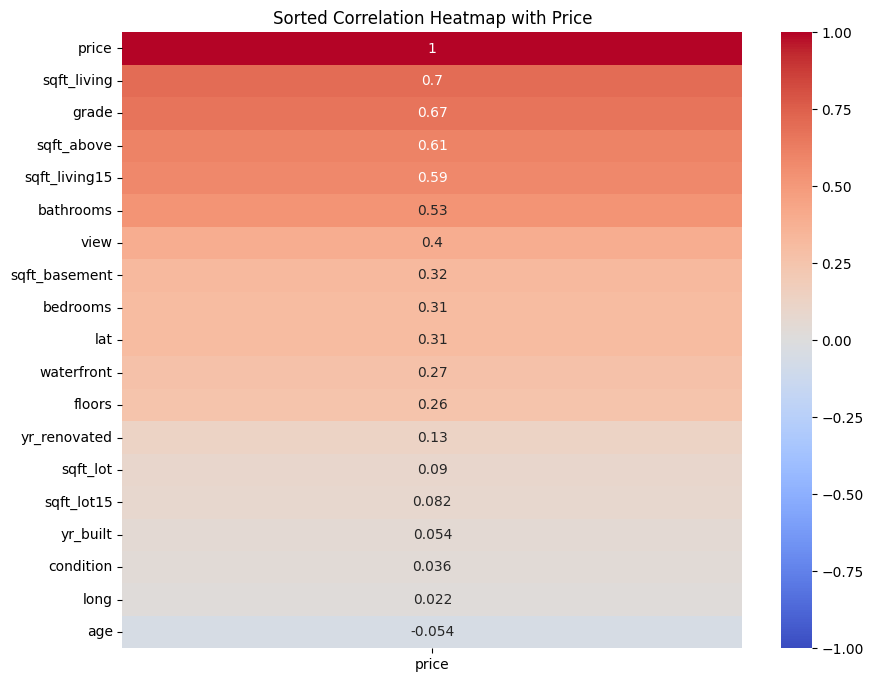

In [404]:
plt.figure(figsize=(10, 8))
correlation_matrix = house.corr()

# Sort the correlation values with respect to 'price'
sorted_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Create a new correlation matrix based on the sorted order
sorted_correlation_matrix = correlation_matrix.loc[sorted_correlation.index, ['price']]

sns.heatmap(sorted_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sorted Correlation Heatmap with Price')
plt.show()

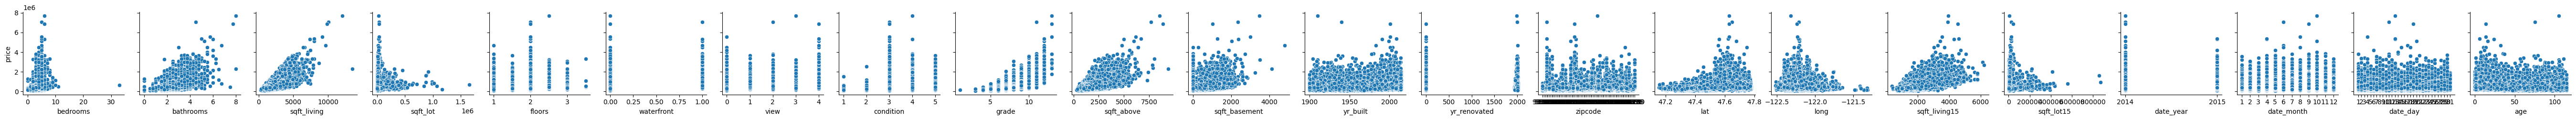

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_year', 'date_month', 'date_day', 'age']


In [405]:
# pair plot
sns.pairplot(house, x_vars=house.columns[1:], y_vars='price')
plt.show()

columns_list = house.columns.tolist()
print(columns_list)

In [447]:
# Features
X_features = ['sqft_living', 'grade', 'sqft_living15', 'sqft_above']
# 'bathrooms'
# Extract features and target variable
X = house[X_features]
y = house['price']

# Extract features and target variable
X_train = house[X_features]
y_train = house['price']

**Split the data into training and test sets**

In [448]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)


# Feature Scaling 

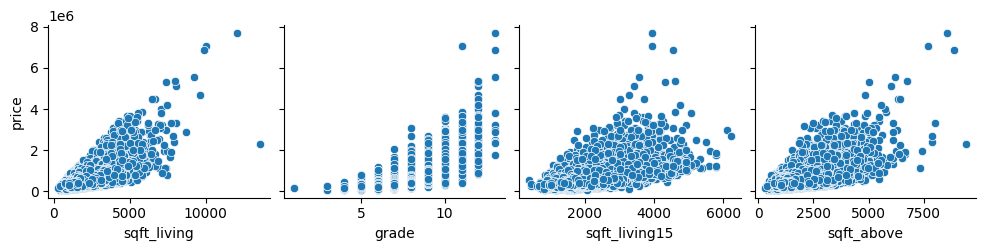

In [408]:
columns_of_interest = ['sqft_living', 'grade', 'sqft_living15','sqft_above' ] # Add the columns you are interested in
subset_df = house[columns_of_interest]

sns.pairplot(house, x_vars=subset_df, y_vars='price')
plt.show()


**Question: What impact each feature of the house might have on price?**
 * Plotting each feature vs. the target, price, provides some indication of which features have the strongest influence on price. Above, increasing size also increases price. Bedrooms don't seem to have a strong impact on price. Newer houses have higher prices than older houses.

**Feature scaling**

In [430]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

**Z-score normalization**

In [431]:
mu = np.mean(X_train, axis=0)   
sigma = np.std(X_train, axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu) / sigma  

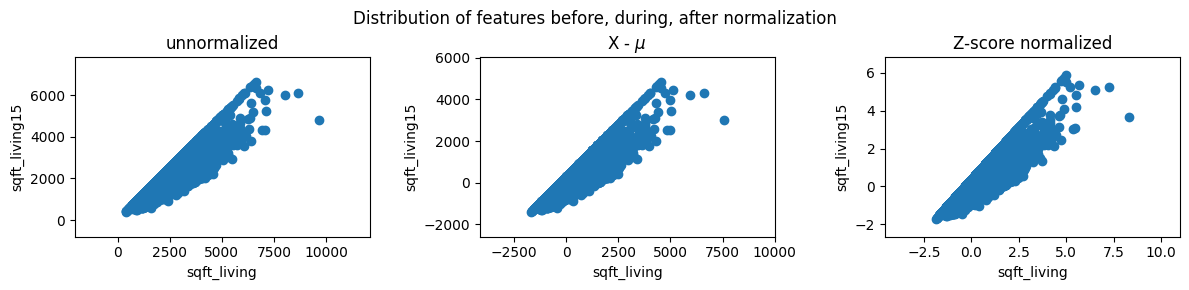

In [432]:
# Plot the scatterplot of the normalized features
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

# Assuming 'X_train' is your DataFrame
ax[0].scatter(X_train[X_features[0]], X_train[X_features[3]])
ax[0].set_xlabel(X_features[0])
ax[0].set_ylabel(X_features[2])
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[X_features[0]], X_mean[X_features[3]])
ax[1].set_xlabel(X_features[0])
ax[1].set_ylabel(X_features[2])
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[X_features[0]], X_norm[X_features[3]])
ax[2].set_xlabel(X_features[0])
ax[2].set_ylabel(X_features[2])
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Distribution of features before, during, after normalization")

# Display the plot
plt.show()


In [433]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range (max-min) by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range (max-min) by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = sqft_living      2080.900405
grade               7.664546
sqft_living15    1982.972238
sqft_above       1789.401966
dtype: float64, 
X_sigma = sqft_living      910.550550
grade              1.175772
sqft_living15    681.686271
sqft_above       826.208545
dtype: float64
Peak to Peak range (max-min) by column in Raw        X:sqft_living      9260.0
grade              10.0
sqft_living15    5391.0
sqft_above       6260.0
dtype: float64
Peak to Peak range (max-min) by column in Normalized X:sqft_living      10.169672
grade             8.505053
sqft_living15     7.908330
sqft_above        7.576780
dtype: float64


In [434]:
# check our work
from sklearn.preprocessing import scale
is_not_equal = (X_norm != scale(X_train, axis=0, with_mean=True, with_std=True, copy=True))
print(f"Total number of observations with different results for feature scaling: {np.sum(is_not_equal)}")

Total number of observations with different results for feature scaling: sqft_living      0
grade            0
sqft_living15    0
sqft_above       0
dtype: int64


In [435]:
# Implement feature scaling
scaler = StandardScaler() # Instantiate a StandardScaler object
# scalar = StandardScaler(with_std=False) # Mean normalization
# scalar = MinMaxScaler() # (x - min)/(max - min)
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform your data
X_test_scaled = scaler.transform(X_test)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train, axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm, axis=0)}")



Peak to Peak range by column in Raw        X:sqft_living      9260.0
grade              10.0
sqft_living15    5391.0
sqft_above       6260.0
dtype: float64
Peak to Peak range by column in Normalized X:sqft_living      10.169672
grade             8.505053
sqft_living15     7.908330
sqft_above        7.576780
dtype: float64


**Ridge regression**

In [436]:
alpha = 10  # This is the regularization strength, you can adjust it based on your needs
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)


Ridge(alpha=10)

In [437]:
y_pred = ridge_model.predict(X_test_scaled)


In [438]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 64435274472.39436
R-squared: 0.5396473683037496


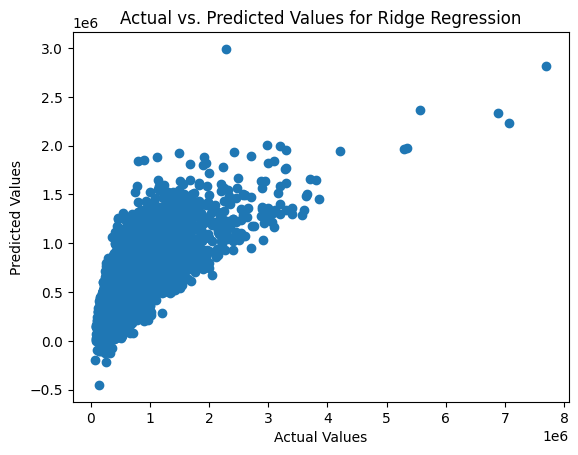

In [439]:
# Optional: Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Ridge Regression')
plt.show()



In [440]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_


In [441]:
coefficients = best_model.coef_
feature_names = columns_of_interest  # Replace with your actual feature names

for feature, coef in zip(feature_names, coefficients):
    print(f'{feature}: {coef}')


sqft_living: 198693.34576342374
grade: 124068.56686871842
sqft_living15: 13401.893080749736
sqft_above: -60831.07725180361


Intercept: 538483.2458068248
sqft_living: 198693.34576342374
grade: 124068.56686871842
sqft_living15: 13401.893080749736
sqft_above: -60831.07725180361


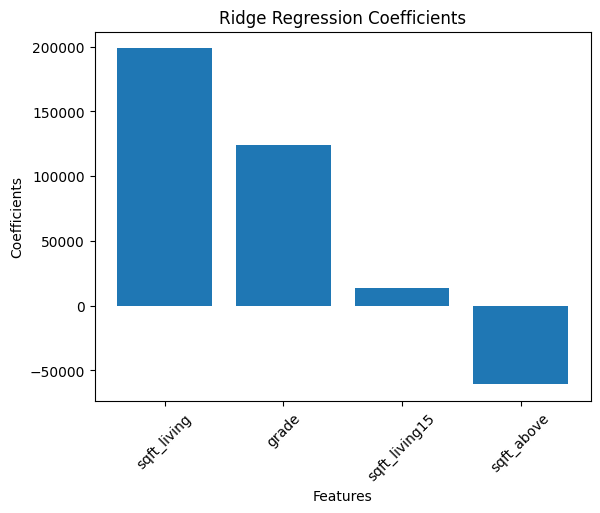

In [442]:
# Assuming you've already trained the Ridge regression model and have the coefficients
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_
feature_names = columns_of_interest  # Replace with your actual feature names

# Print the intercept
print(f'Intercept: {intercept}')

# Print and interpret the coefficients
for feature, coef in zip(feature_names, coefficients):
    print(f'{feature}: {coef}')

# Optional: Plot the coefficients
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficients')
plt.xticks(rotation=45)
plt.show()


In [444]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to try
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Create a parameter grid
param_grid = {'alpha': alphas}

# Instantiate the Ridge regression model
ridge_model = Ridge()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameter value
best_alpha = grid_search.best_params_['alpha']
print(f'Best Alpha: {best_alpha}')

# Get the best Ridge model
best_model = grid_search.best_estimator_

# Train the best model on the entire training set
best_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Best Alpha: 10.0
Mean Squared Error: 64435274472.39436
R-squared: 0.5396473683037496


In [460]:
from sklearn.linear_model import Ridge

# Assuming X_train, y_train, and other variables are already defined

# Instantiate Ridge regression model
alpha = 1.0  # You can adjust the regularization strength (alpha) as needed
ridge_model = Ridge(alpha=alpha)

# Train the Ridge regression model
ridge_model.fit(X_train, y_train)

# Print predictions and targets
print(f"Prediction on training set:\n {ridge_model.predict(X_train)[:4]}")
print(f"Prediction using w, b:\n {(X_train @ ridge_model.coef_.T + ridge_model.intercept_)[:4]}")
print(f"Target values:\n {y_train[:4]}")

# Predict for a new example (x_house)
x_house = np.array([2000,7,2000,1000]).reshape(1, -1)
x_house_predict = ridge_model.predict(x_house)[0]
print(f"Predicted price of a house with {x_house.flatten()} is = ${x_house_predict:0.2f}")



Prediction on training set:
 [277310.67 376234.14 132358.15 369443.08]
Prediction using w, b:
 3802     277310.672095
15621    376234.137570
15447    132358.145168
10117    369443.082902
dtype: float64
Target values:
 3802     225000.0
15621    220000.0
15447    257000.0
10117    460000.0
Name: price, dtype: float64
Predicted price of a house with [2000    7 2000 1000] is = $510034.51


**Create and fit the regression model**

In [450]:
# Training the regression model
sgdr = SGDRegressor(max_iter=1000) # Instantiate a SGDRegressor object
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 8, number of weight updates: 69161.0


**View parameters**

In [451]:
# Extract optimized parameter values from the trained model
b_norm = sgdr.intercept_ # Bias b
w_norm = sgdr.coef_ # Weights w
print(f"model parameters: w: {w_norm}, b:{b_norm}")

model parameters: w: [196142.88 119363.01  12324.1  -67807.22], b:[536691.91]


**Make prediction**

In [452]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:1000]}" )
print(f"Target values \n{y_train[:1000]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[ 289190.5   384534.1   151398.76  374257.15  300828.86  337125.36
  540981.62  603987.02  320061.84  605138.13  605817.81  722678.41
  353917.32  436491.1   286794.49 1029566.88  496003.82  591420.33
  265234.89  452269.13  391576.07  668382.84  774158.74  239516.69
  621455.14  786254.25  425807.78  -11117.98  487630.85  334322.76
  536728.41  482691.01  652723.6   971054.02  605997.07  344334.77
  475052.13  748262.76  586351.5   412179.71 1320833.96  336605.12
  187310.05  719267.2   745438.79  715674.31  323564.5   701952.52
  571083.    313168.99  307676.69  695017.9   895472.3   792411.04
  370998.06  852833.95  169320.46  345349.61  217729.79 1118451.19
  526987.21  292693.37  418230.71  429220.63  216463.51  781372.96
  540366.67  213624.63  600007.88  749009.55  372357.74  354572.58
  479880.11  490918.01  452117.04  956815.98  457807.47  677145.65
  514793.78  984591.78  179851.96  684825.1   

**Plot results**

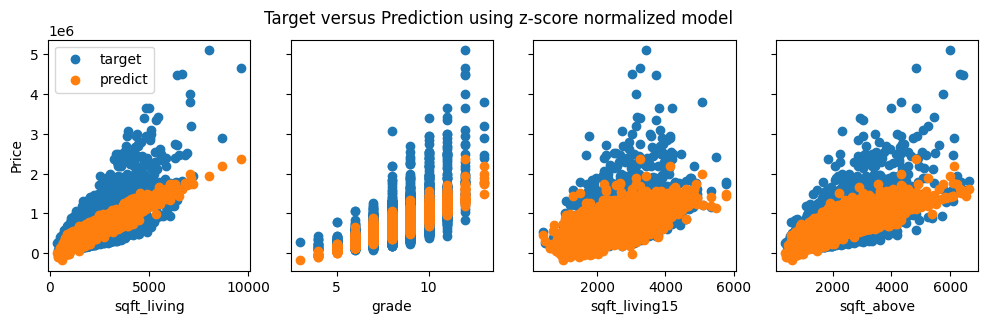

In [458]:
# Plot predictions and targets vs original features    
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i, feature in enumerate(X_features):
    ax[i].scatter(X_train[feature], y_train, label='target')
    ax[i].set_xlabel(feature)
    ax[i].scatter(X_train[feature], y_pred, label='predict')

ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("Target versus Prediction using z-score normalized model")

# Display the plot
plt.show()